# SVM(Support Vector Machine)
SVM Hyperparameter Tuning using GridSearchCV
- https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data 

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Split_train/test data 

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1).iloc[:, :2]
y = df['class']
X.head()
y.value_counts(normalize=True)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


0    0.333333
1    0.333333
2    0.333333
Name: class, dtype: float64

## 3. SVM loss function
https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html

(0.0, 7.0)

Text(0.5, 0, 'Decision function $f(x)$')

Text(0, 0.5, '$L(y=1, f(x))$')

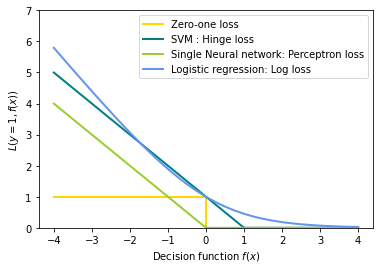

In [18]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color="gold", lw=lw, label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color="teal", lw=lw, label="SVM : Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color="yellowgreen", lw=lw, label="Single Neural network: Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color="cornflowerblue", lw=lw, label="Logistic regression: Log loss")

plt.ylim((0, 7))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

## 4. Tunning points : (1) kernel, (2) margin_c (3) gamma

### 4.1. Kernels (Train a SVC model using different kernal)
The main function of the kernel is to take low dimensional input space and transform it into a higher-dimensional space. It is mostly useful in non-linear separation problem.
<img src='https://miro.medium.com/max/1380/1*AFqQio7ZB91FZvFtuYAn-w.png' width=500 height=500>

In [19]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [20]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', max_iter =500, degree=8, gamma="auto")
    
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', max_iter =500, gamma="auto")
    
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', max_iter =500, gamma="auto")
    
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', max_iter =500, gamma="auto")

In [21]:
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

SVC(degree=8, gamma='auto', kernel='poly', max_iter=500)

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00         8
           2       0.27      0.33      0.30         9

    accuracy                           0.53        30
   macro avg       0.42      0.44      0.43        30
weighted avg       0.52      0.53      0.52        30



SVC(gamma='auto', max_iter=500)

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.71      0.62      0.67         8
           2       0.77      0.83      0.80        12

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.83      0.83      0.83        30



SVC(gamma='auto', kernel='sigmoid', max_iter=500)

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.23      1.00      0.38         7
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        13

    accuracy                           0.23        30
   macro avg       0.08      0.33      0.13        30
weighted avg       0.05      0.23      0.09        30



SVC(gamma='auto', kernel='linear', max_iter=500)

Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.88      0.47      0.61        15
           2       0.38      0.83      0.53         6

    accuracy                           0.70        30
   macro avg       0.75      0.77      0.71        30
weighted avg       0.81      0.70      0.71        30



In [22]:
from mlxtend.plotting import plot_decision_regions

def plot_model(X, y, clf) :
    print('*'*50); print(clf)
    clf.fit(X, y)
    plt.figure(figsize=(12,3))
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title(clf)

**************************************************
SVC(degree=8, gamma='auto', kernel='poly', max_iter=500)
**************************************************
SVC(gamma='auto', max_iter=500)
**************************************************
SVC(gamma='auto', kernel='sigmoid', max_iter=500)
**************************************************
SVC(gamma='auto', kernel='linear', max_iter=500)


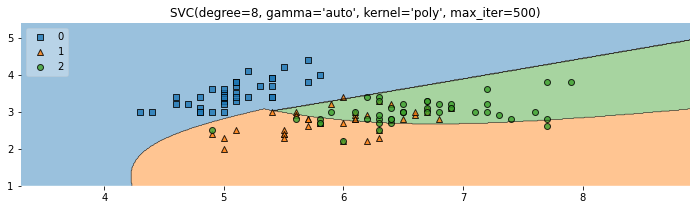

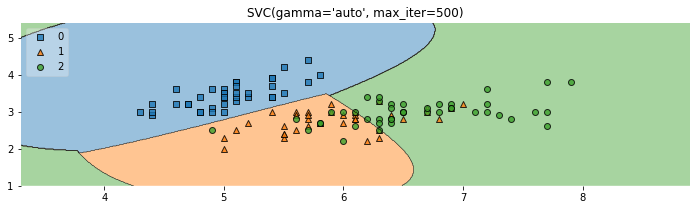

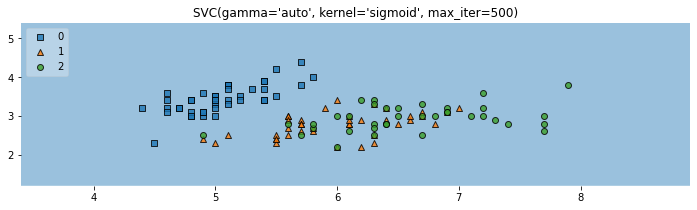

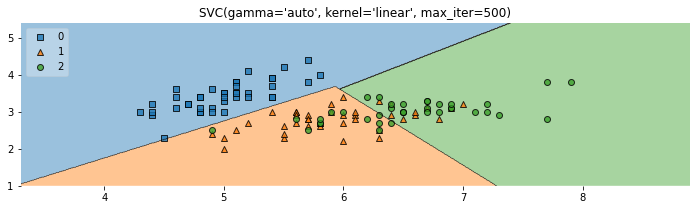

In [23]:
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    svclassifier = getClassifier(i) 
    plot_model(X_train.values, y_train.values, svclassifier)

### 4.2. C(margin)
C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. 
when C is high it will classify all the data points correctly, also there is a chance to overfit.

<img src='https://miro.medium.com/max/1000/0*08KrYhXpVQdUXWrX' width=800 height=500>

In [24]:
def getClassifier_c(ktype):
    if ktype == 0:
        return SVC(kernel='rbf', max_iter =500, C = 0.05)
    elif ktype == 1:
        return SVC(kernel='rbf', max_iter =500, C = 0.1)
    elif ktype == 2:
        return SVC(kernel='rbf', max_iter =500, C = 1.0)
    elif ktype == 3:
        return SVC(kernel='rbf', max_iter =500, C = 10)

**************************************************
SVC(C=0.05, max_iter=500)
**************************************************
SVC(C=0.1, max_iter=500)
**************************************************
SVC(max_iter=500)
**************************************************
SVC(C=10, max_iter=500)


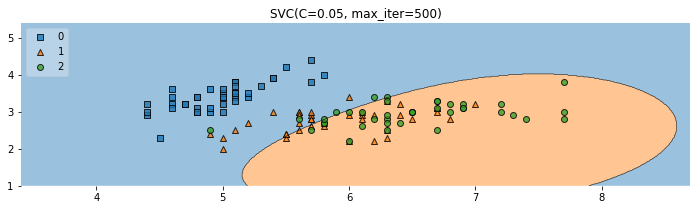

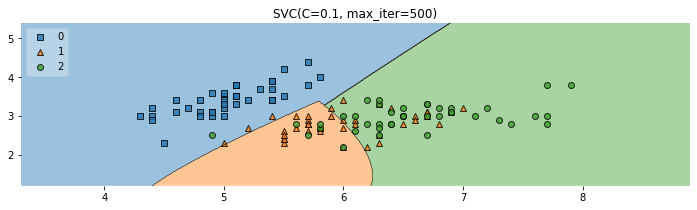

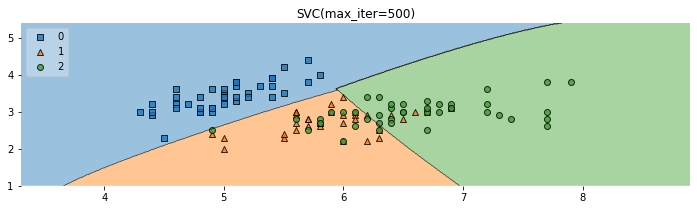

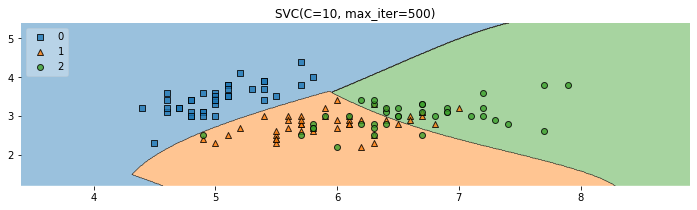

In [25]:
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    svclassifier = getClassifier_c(i) 
    plot_model(X_train.values, y_train.values, svclassifier)

### 4.3. gamma
It defines how far influences the calculation of plausible line of separation.
When gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.
<img src='https://miro.medium.com/max/1713/1*6HVomcqW7BWuZ2vvGOEptw.png' width=600 height=500>

In [26]:
def getClassifier_c(ktype):
    if ktype == 0:
        return SVC(kernel='rbf', max_iter =500, gamma=0.01)
    elif ktype == 1:
        return SVC(kernel='rbf', max_iter =500, gamma=0.1)
    elif ktype == 2:
        return SVC(kernel='rbf', max_iter =500, gamma=1.0)
    elif ktype == 3:
        return SVC(kernel='rbf', max_iter =500, gamma=10)

**************************************************
SVC(gamma=0.01, max_iter=500)
**************************************************
SVC(gamma=0.1, max_iter=500)
**************************************************
SVC(gamma=1.0, max_iter=500)
**************************************************
SVC(gamma=10, max_iter=500)


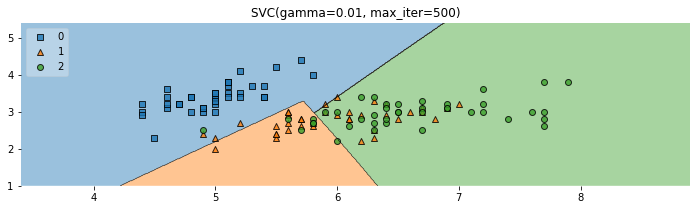

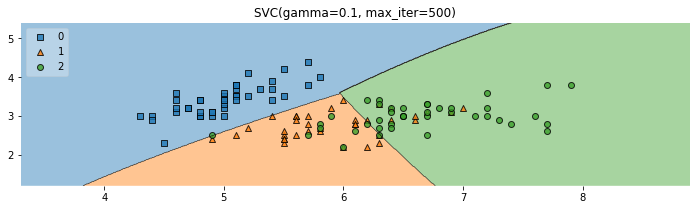

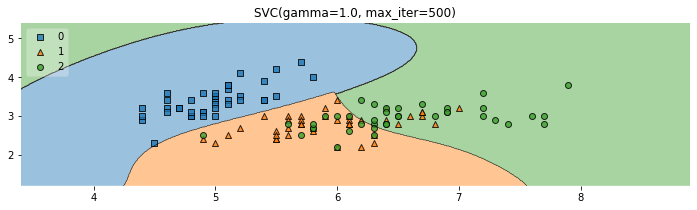

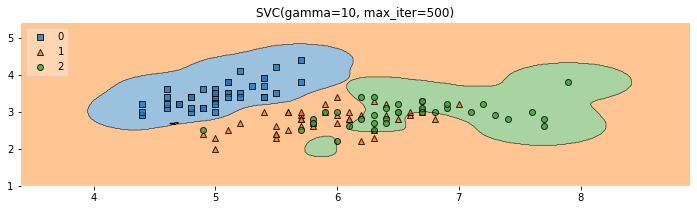

In [27]:
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    svclassifier = getClassifier_c(i) 
    plot_model(X_train.values, y_train.values, svclassifier)

## 5. Tuning the hyper-parameters of an estimator
- Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn, they are passed as arguments to the constructor of the estimator classes. 
- Grid search is commonly used as an approach to hyper-parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.
- GridSearchCV helps us combine an estimator with a grid search preamble to tune hyper-parameters.

In [28]:
from sklearn.model_selection import GridSearchCV

Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma

In [29]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [30]:
grid = GridSearchCV(SVC(max_iter=500),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(max_iter=500),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [31]:
print(grid.best_estimator_)

SVC(C=1, gamma=1, max_iter=500)


In [32]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[8 1 0]
 [0 6 1]
 [0 5 9]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.50      0.86      0.63         7
           2       0.90      0.64      0.75        14

    accuracy                           0.77        30
   macro avg       0.80      0.80      0.77        30
weighted avg       0.84      0.77      0.78        30



# END